In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os

In [2]:
from pathlib import Path
from keras import backend as K
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_data_path = '../../sensix_daninhas/dataset_100x100/train'
test_data_path  = '../../sensix_daninhas/dataset_100x100/validation'

In [4]:
img_rows = 100
img_cols = 100
epochs = 300
batch_size = 32

In [5]:
num_of_train_samples = len(glob.glob(train_data_path + "/**/*" + ".jpg" , recursive=True))
num_of_test_samples  = len(glob.glob(test_data_path + "/**/*" + ".jpg"  , recursive=True))
print("Train Images : ", num_of_train_samples)
print("Test Images  : ", num_of_test_samples)


Train Images :  193
Test Images  :  43


In [6]:
def show_images(generator):
    generator.fit(images)
    image_iterator = generator.flow(images)

    fig, rows = plt.subplots(nrows=1, ncols=15, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

In [48]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,       # rotaciona a imagem
                                   width_shift_range=0.8,   # zoom com base na largura
                                   height_shift_range=0.2,  # zoom com base na altura 
                                   shear_range=0.2,         # efeito de perspectiva
                                   zoom_range=0.2,          # zoom na imagem como um todo
                                   horizontal_flip=True,    # espelha em relação ao eixo vertical
                                   fill_mode='wrap'         # constant, nearest, reflect e wrap
                                  )                         ## "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
                                                            ## "nearest":  aaaaaaaa|abcd|dddddddd
                                                            ## "reflect":  abcddcba|abcd|dcbaabcd
                                                            ## "wrap":     abcdabcd|abcd|abcdabcd

#show_images(train_datagen)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 193 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/300
6/6 [==============================] - 3s 332ms/step - loss: 0.9104 - accuracy: 0.4703 - val_loss: 0.6882 - val_accuracy: 0.5312
Epoch 2/300
6/6 [==============================] - 1s 212ms/step - loss: 0.7023 - accuracy: 0.5191 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 3/300
6/6 [==============================] - 1s 214ms/step - loss: 0.6900 - accuracy: 0.5135 - val_loss: 0.6919 - val_accuracy: 0.4062
Epoch 4/300
6/6 [==============================] - 2s 242ms/step - loss: 0.6908 - accuracy: 0.4594 - val_loss: 0.6938 - val_accuracy: 0.4688
Epoch 5/300
6/6 [==============================] - 1s 218ms/step - loss: 0.6880 - accuracy: 0.5129 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 6/300
6/6 [==============================] - 1s 219ms/step - loss: 0.7362 - accuracy: 0.5767 - val_loss: 0.6917 - val_accuracy: 0.4375
Epoch 7/300
6/6 [==============================] - 1s 199ms/step - loss: 0.6754 - accuracy: 0.5856 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 8/300
6

Epoch 59/300
6/6 [==============================] - 1s 201ms/step - loss: 0.4382 - accuracy: 0.7844 - val_loss: 1.0865 - val_accuracy: 0.7188
Epoch 60/300
6/6 [==============================] - 1s 217ms/step - loss: 0.5308 - accuracy: 0.7995 - val_loss: 0.4792 - val_accuracy: 0.7500
Epoch 61/300
6/6 [==============================] - 1s 267ms/step - loss: 0.6570 - accuracy: 0.7290 - val_loss: 0.4832 - val_accuracy: 0.7812
Epoch 62/300
6/6 [==============================] - 1s 207ms/step - loss: 0.6725 - accuracy: 0.8779 - val_loss: 1.2209 - val_accuracy: 0.5312
Epoch 63/300
6/6 [==============================] - 1s 201ms/step - loss: 0.8367 - accuracy: 0.5288 - val_loss: 0.5872 - val_accuracy: 0.6875
Epoch 64/300
6/6 [==============================] - 2s 264ms/step - loss: 0.4780 - accuracy: 0.7896 - val_loss: 0.3932 - val_accuracy: 0.8438
Epoch 65/300
6/6 [==============================] - 1s 283ms/step - loss: 0.3233 - accuracy: 0.8903 - val_loss: 0.5476 - val_accuracy: 0.6875
Epoch 

6/6 [==============================] - 1s 231ms/step - loss: 0.3682 - accuracy: 0.8693 - val_loss: 0.3845 - val_accuracy: 0.7188
Epoch 117/300
6/6 [==============================] - 2s 243ms/step - loss: 0.2876 - accuracy: 0.9129 - val_loss: 0.1629 - val_accuracy: 0.9688
Epoch 118/300
6/6 [==============================] - 1s 206ms/step - loss: 0.2634 - accuracy: 0.8300 - val_loss: 0.2916 - val_accuracy: 0.8750
Epoch 119/300
6/6 [==============================] - 2s 246ms/step - loss: 0.5205 - accuracy: 0.8141 - val_loss: 0.2908 - val_accuracy: 0.8438
Epoch 120/300
6/6 [==============================] - 1s 237ms/step - loss: 0.3534 - accuracy: 0.8849 - val_loss: 0.3647 - val_accuracy: 0.8750
Epoch 121/300
6/6 [==============================] - 1s 222ms/step - loss: 0.4350 - accuracy: 0.8285 - val_loss: 0.4380 - val_accuracy: 0.8438
Epoch 122/300
6/6 [==============================] - 1s 205ms/step - loss: 0.2454 - accuracy: 0.9414 - val_loss: 0.5219 - val_accuracy: 0.8438
Epoch 123/300

6/6 [==============================] - 1s 215ms/step - loss: 0.1482 - accuracy: 0.9222 - val_loss: 2.4680 - val_accuracy: 0.7500
Epoch 174/300
6/6 [==============================] - 1s 199ms/step - loss: 0.1682 - accuracy: 0.9369 - val_loss: 0.2657 - val_accuracy: 0.9375
Epoch 175/300
6/6 [==============================] - 1s 212ms/step - loss: 0.1518 - accuracy: 0.9466 - val_loss: 53.2559 - val_accuracy: 0.5000
Epoch 176/300
6/6 [==============================] - 1s 224ms/step - loss: 14.8627 - accuracy: 0.7504 - val_loss: 0.2554 - val_accuracy: 0.8125
Epoch 177/300
6/6 [==============================] - 1s 202ms/step - loss: 0.2430 - accuracy: 0.9034 - val_loss: 0.2415 - val_accuracy: 0.8438
Epoch 178/300
6/6 [==============================] - 1s 210ms/step - loss: 0.1743 - accuracy: 0.9603 - val_loss: 0.1498 - val_accuracy: 0.9688
Epoch 179/300
6/6 [==============================] - 2s 248ms/step - loss: 0.1763 - accuracy: 0.9308 - val_loss: 0.2858 - val_accuracy: 0.8438
Epoch 180/3

6/6 [==============================] - 1s 261ms/step - loss: 0.3679 - accuracy: 0.9449 - val_loss: 0.2561 - val_accuracy: 0.9688
Epoch 231/300
6/6 [==============================] - 1s 213ms/step - loss: 0.3104 - accuracy: 0.8633 - val_loss: 0.2278 - val_accuracy: 0.9375
Epoch 232/300
6/6 [==============================] - 1s 205ms/step - loss: 0.2130 - accuracy: 0.9263 - val_loss: 0.1490 - val_accuracy: 0.9688
Epoch 233/300
6/6 [==============================] - 2s 245ms/step - loss: 0.1570 - accuracy: 0.9553 - val_loss: 0.1232 - val_accuracy: 0.9688
Epoch 234/300
6/6 [==============================] - 2s 244ms/step - loss: 0.1010 - accuracy: 0.9584 - val_loss: 1.3381 - val_accuracy: 0.8125
Epoch 235/300
6/6 [==============================] - 1s 218ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.2800 - val_accuracy: 0.8750
Epoch 236/300
6/6 [==============================] - 1s 214ms/step - loss: 0.0995 - accuracy: 0.9403 - val_loss: 0.1198 - val_accuracy: 0.9375
Epoch 237/300

6/6 [==============================] - 1s 212ms/step - loss: 0.1920 - accuracy: 0.9419 - val_loss: 0.3229 - val_accuracy: 0.8438
Epoch 288/300
6/6 [==============================] - 1s 212ms/step - loss: 0.1605 - accuracy: 0.9481 - val_loss: 0.1369 - val_accuracy: 0.9375
Epoch 289/300
6/6 [==============================] - 1s 199ms/step - loss: 0.1334 - accuracy: 0.9542 - val_loss: 0.1278 - val_accuracy: 0.9375
Epoch 290/300
6/6 [==============================] - 1s 208ms/step - loss: 0.1272 - accuracy: 0.9380 - val_loss: 0.2725 - val_accuracy: 0.9062
Epoch 291/300
6/6 [==============================] - 1s 237ms/step - loss: 0.1825 - accuracy: 0.9318 - val_loss: 0.1965 - val_accuracy: 0.9062
Epoch 292/300
6/6 [==============================] - 2s 242ms/step - loss: 0.0955 - accuracy: 0.9542 - val_loss: 0.2453 - val_accuracy: 0.9062
Epoch 293/300
6/6 [==============================] - 1s 210ms/step - loss: 2.2601 - accuracy: 0.9175 - val_loss: 0.1362 - val_accuracy: 1.0000
Epoch 294/300

In [46]:
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#print(Y_pred)

In [47]:
print("Real :       ", validation_generator.classes)
print("Prediction : ", y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Real :        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Prediction :  [1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1]
Confusion Matrix
[[13  8]
 [15  7]]


In [20]:
print('Classification Report')
target_names = ['daninhas', 'sem_daninhas']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    daninhas       0.54      0.71      0.61        21
sem_daninhas       0.60      0.41      0.49        22

    accuracy                           0.56        43
   macro avg       0.57      0.56      0.55        43
weighted avg       0.57      0.56      0.55        43



In [17]:
model.save("daninhas_confusion_matrix_jp.h5")

In [34]:
image_path = '../../sensix_daninhas/dataset_100x100/validation/daninha'

images = []

for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(100,100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        processed_image = np.array(img, dtype="float") / 255
        images.append(processed_image)

images = np.vstack(images)

count_daninha 13
count_sem_daninha 8


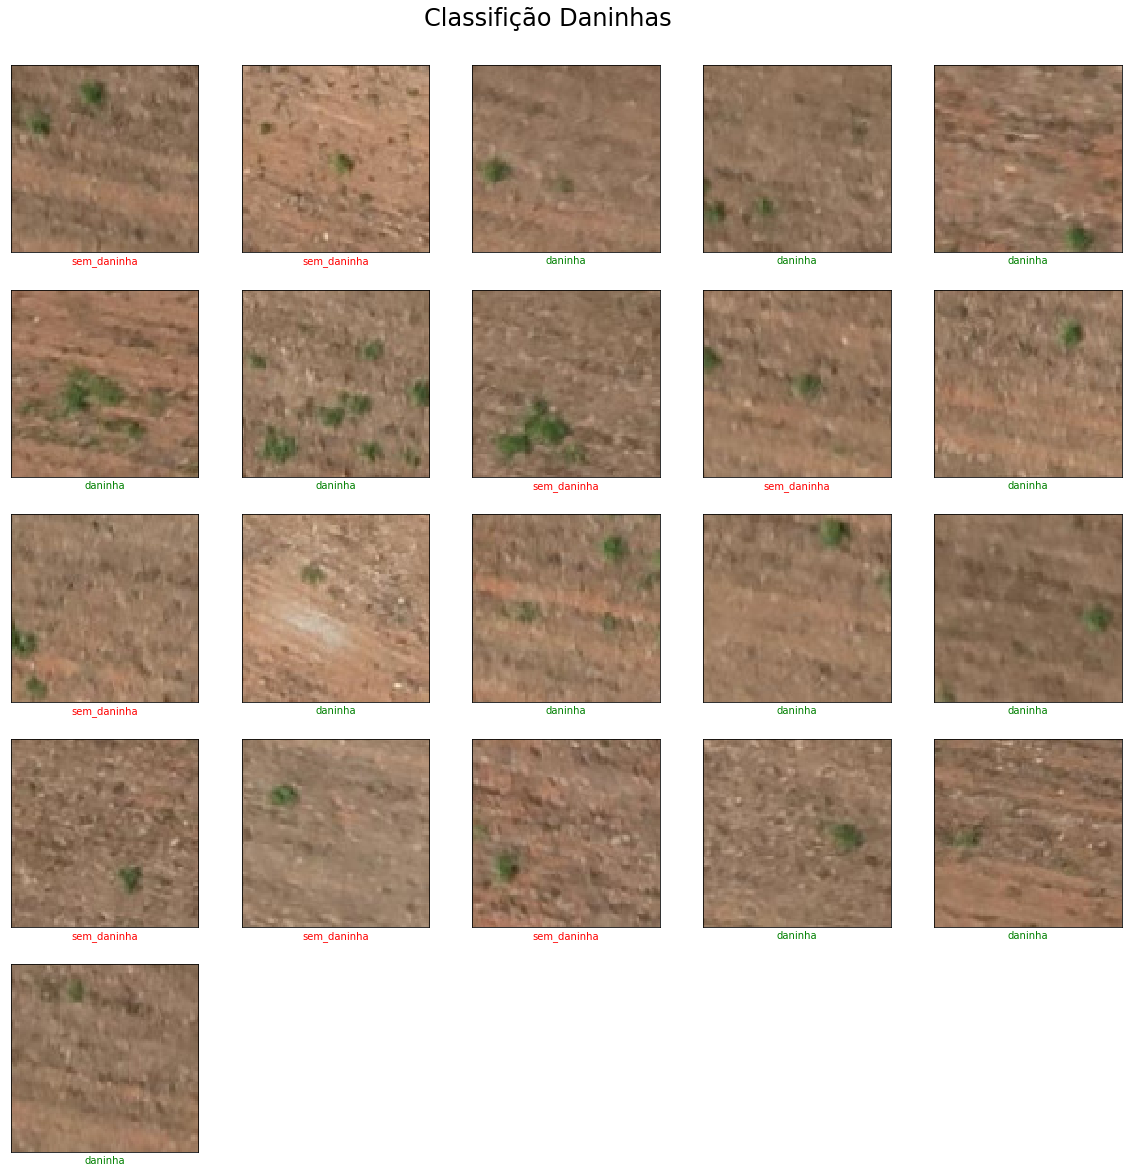

In [33]:
images_data = []
filenames = []
count_daninha = 0
count_sem_daninha = 0
count = 0

pred_result = model.predict(validation_generator, num_of_test_samples // batch_size+1)
plt.figure(figsize=(20,20))
grid_size = min(50, len(pred_result))

for filename in os.listdir(image_path):
    images_data.append(pred_result)
    filenames.append(filename)
    plt.subplot(5, 5, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count], cmap=plt.cm.binary)
    if pred_result[count][0]> pred_result[count][1]:
        legend_x = plt.xlabel("daninha")
        legend_x.set_color("green")
        count_daninha = count_daninha + 1
        if count >= num_of_test_samples -1:
            break
    else :
        legend_x = plt.xlabel("sem_daninha")
        legend_x.set_color("red")
        count_sem_daninha = count_sem_daninha + 1
    count += 1

print("count_daninha", count_daninha)
print("count_sem_daninha", count_sem_daninha)
plt.suptitle('Classifição Daninhas', y = 0.92, fontsize=24)
plt.show()
#print(pred_result)
#print(pred_result[0])
#print(pred_result[0][1])
